In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical operations ,arrays  ...
import matplotlib.pyplot as plt #for creating statics ,interactive  plot , graphs ...
from imblearn.over_sampling import RandomOverSampler # used to balance dataset by oversampling minority classes
# its like when we have a minority  classes in our dataset -> so we duplicate randomly  samples of this minority  using this , in order to balance our dataset
from sklearn.preprocessing import StandardScaler # for standarize dataset features (0,1)
import copy
import seaborn as sns # for advanced data visualization
import tensorflow as tf # DL framwork (build and training ML models )
from sklearn.linear_model import LinearRegression

StandarScaler ?
* first we calculate mean = sum(all values) / toal Number of  value
* then standard deviation STD =
    -  frist we calculate the distance of the value from the mean (can be negatif if the value < mean and positif if the value > mean)
    - **std = √( (1/N) × Σᵢ (xᵢ - mean)² )**
* then we apply th e formula

 **x_scaled = (x - mean) / std**, on each value
    - substracts the mean -> the data ic centered at 0
    - devides by the std -> data has a spread of 1

-> Definition of our  columns name

-> Uploading Our dataset  as df

In [2]:
dataset_cols = ["bike_count" , "hour" , "temp" , "humidity" , "wind" , "visibility" , "dew_pt_temp","radiation" , "rain" , "snow" , "functional"]
df = pd.read_csv("SeoulBikeData.csv", encoding='cp949')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df = pd.read_csv("SeoulBikeData.csv", encoding='cp949').drop(["Date","Holiday","Seasons"], axis =1 )# axis 1 , drop columns not rows
df.columns = dataset_cols # rename  the dataset columns with our dataset_cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


Some simple operations for dataset manipulation

In [6]:
df["functional"] = (df["functional"] == "Yes").astype(int)#converting Yes/no into 1/0
df = df[df["hour"] == 12] #filtering and kee only rows with 12 hours
df = df.drop(["hour"] , axis =1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


# **Relation between each feautre and the  bike_count**

the goal of these  scatter plots -> detect if there is a visible relationshi [Linear - not ] between the feature and how many bikes are rented

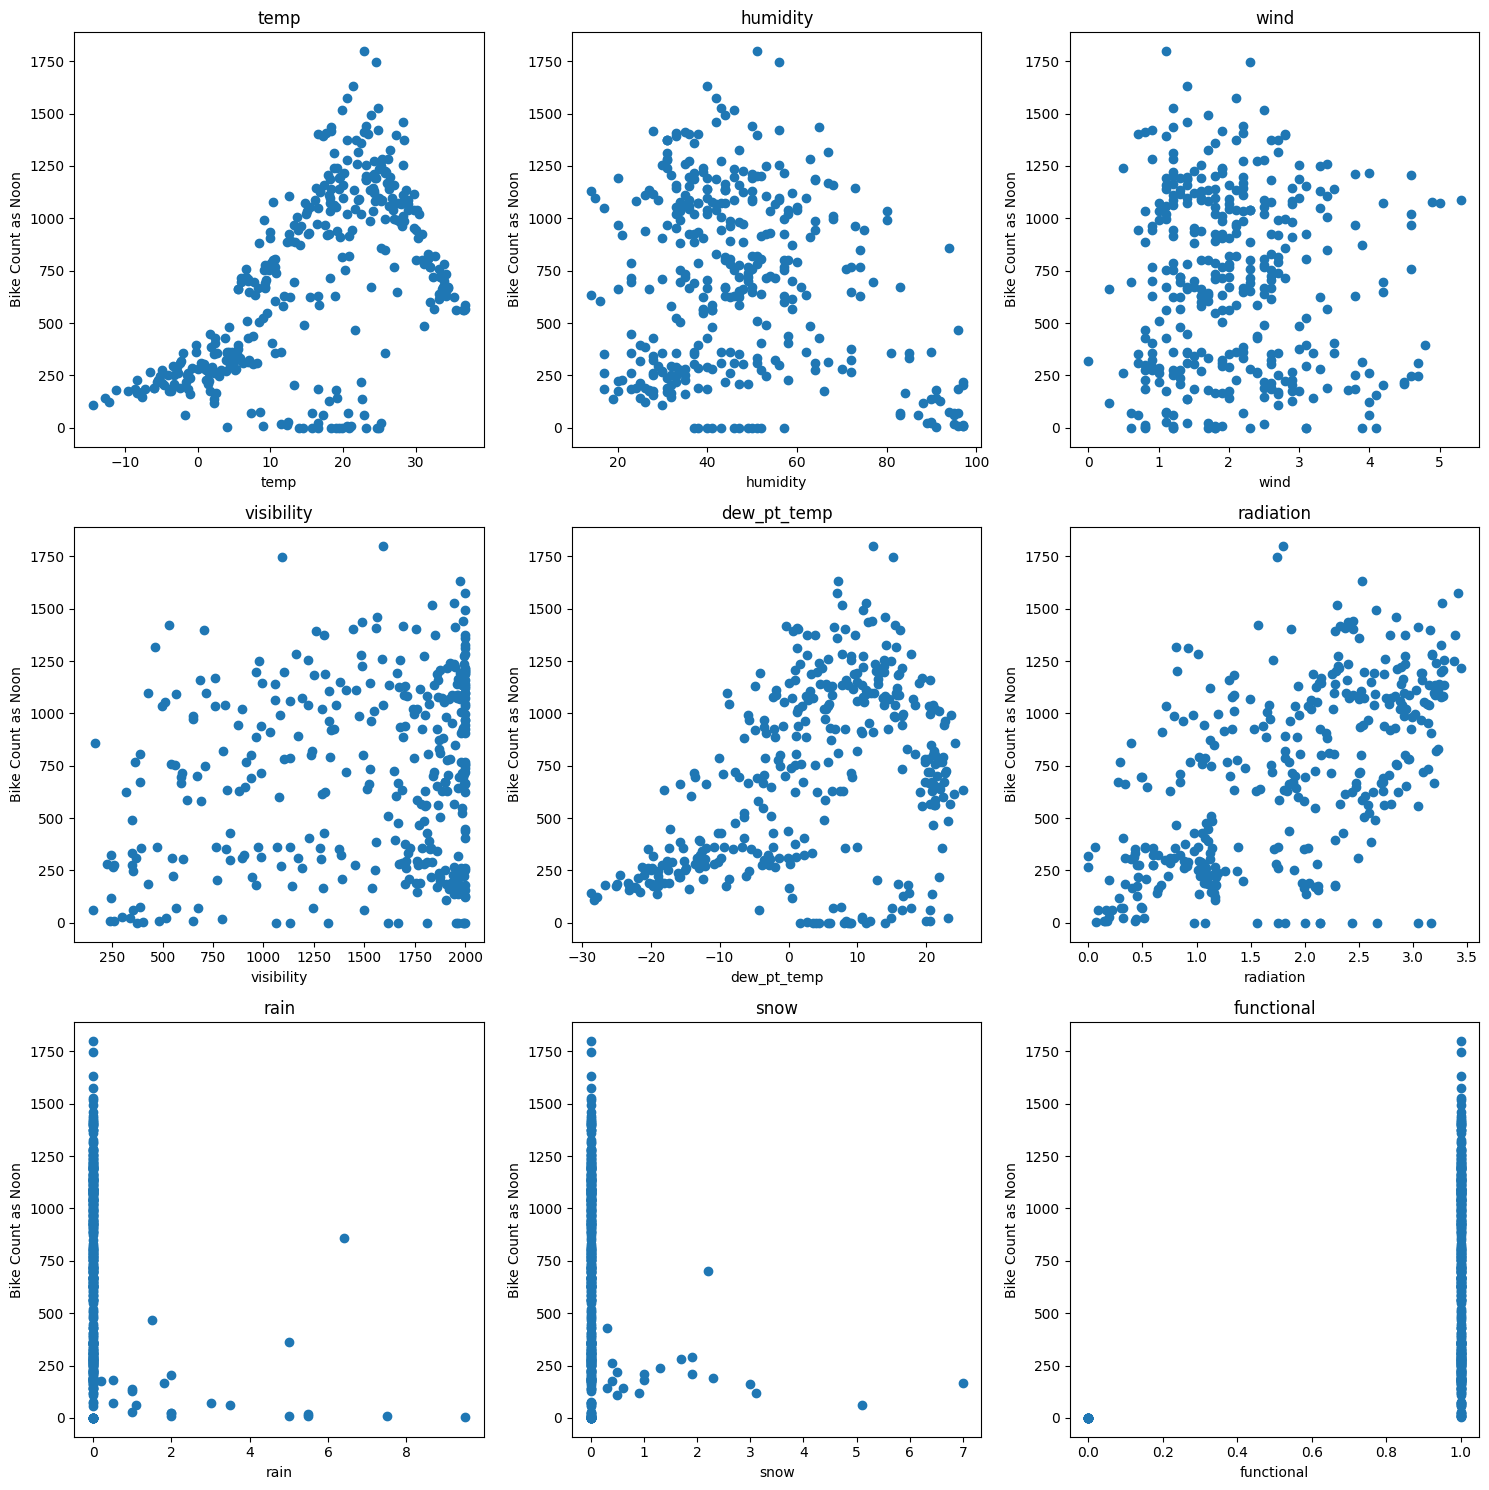

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 9 plots sur une grille 3x3
axs = axs.ravel()  # Flatten for easier access

for i, label in enumerate(df.columns[1:]):  # ignore "bike_count"
    axs[i].scatter(df[label], df["bike_count"])
    axs[i].set_title(label)
    axs[i].set_xlabel(label)
    axs[i].set_ylabel("Bike Count as Noon")

plt.tight_layout()
plt.show()


### **Interpretation**
* temp -> temperature increase -> bike count increase -> positive correlation
* humidity -> weak - non linear correlation
* wind  -> very weak - non correlation
* visibility -> small positiv correlation
* dew_pt_temp -> positiv correlation
* radiation -> positiv correlation
* rain -> strong negatif correlation
* snow -> strong negatif correlation
* functional -> 2 groups (0-1) -> notice that when functional =1 -> more bike rentals -> its the categorical variable effect

In [8]:
df = df.drop(["wind", "visibility" , "functional"] , axis=1)

In [10]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# **Train - Valid - Test DataSet**

deviding the data indo 3 part :
- Training dataset  from 0-60%
- validation dataset from 60% to 80%
- test dataset from 80% o the end -100%

In [11]:
train , val , test = np.split(df.sample(frac=1) , [int(0.6*len(df)) , int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


**Purpose of get_xy**

extracts X - y from the dataframe

 - X = the input of  the model (features of the dataset)
 - Y = what the model should predict

In [12]:
#y_label = variable cible
#x_label features thatt we will use it from our dataset
def get_xy( dataframe , y_label , x_labels=None):
  # in order to not modify the original dataframe by mistake so we copy it
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    # ifnot precise the x_label - so we will take all the features excluded the y_label
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    #chcking all the columns [dataframe.columns] - > take the all excluded  the y_label
    # change it into a numpy array [.values] not a dataframe
  else:
    if len(x_labels) == 1:
      # taking only the first - then reshape it (-1,1) : make it 2D array with only one column and a lot of rows
      #values. the same -> to make it a numpy array
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1 , 1)
  #create one table to combine x and y . y its the last column
  data = np.hstack((X,y))

  return data , X , y

for the 3 part of the data set (train/val/test)
* Select the temp column as the input feature X.

* Select the bike_count column as the output label y

In [13]:
_,X_train_temp , y_train_temp = get_xy(train , "bike_count" , x_labels=["temp"])
_,X_val_temp , y_val_temp = get_xy(val , "bike_count" , x_labels=["temp"])
_,X_test_temp , y_test_temp = get_xy(test , "bike_count" , x_labels=["temp"])

# **Linear Regression simple Model**



## **Create the model ➔ Train it using temperature to predict bike usage.**

in this part ->  im creating a linear **regression model** and training it to learn the **relationship** between temperature (temp) and the number of bikes (bike_count) based on my  training data

**whats a linear regression model ?**

its like trying to find the best straight line (linear relationship ) between my input feature (temp in my case ) and the target (bike_count in my case)

In [14]:
temp_reg = LinearRegression() # creating the instance
temp_reg.fit(X_train_temp , y_train_temp) # Training the model - using my dataset pre-prepared

LinearRegression()

The model will tries to draw a straight line through the points (each point its one example (temp,bike_count))

- that line should be close as possible to all the points

- the line equation y = wx + b
    - y -> the predicted bike count
    - x > the temprture  that we would to predict her bike count
    - w -> the slope of line : how much the bike count increases when temperature increases
    - b -> intercept = the bike count when tem = 0

### **How the model is doing this ?**

 **-->** calculate the  best **slop** "w" and  the **intercept**  "b"

**-->** by minimizing error between the real count ( my y_train_temp) and the predicted bike counts (the result of the model)

**-->**  minimizing the value is by reducing the average difference between the predicted an d the actual values -> minimizing the **mean squared error**

In [15]:
#printing  the parameters of the  equation of the line (the model found)
print(temp_reg.coef_ , temp_reg.intercept_)

[[20.5011347]] [382.75703677]


In [16]:
temp_reg.score(X_test_temp , y_test_temp)

0.3145735113789663

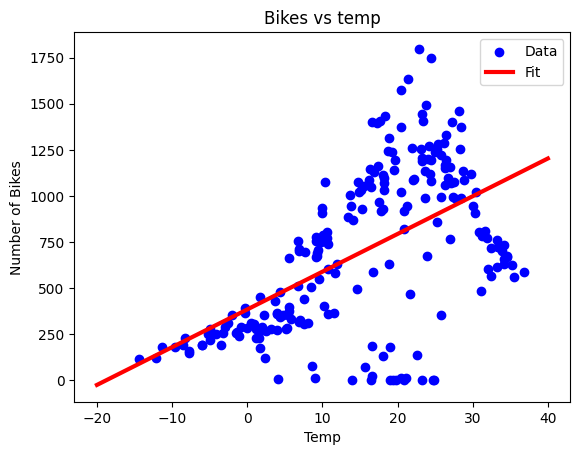

In [17]:
plt.scatter(X_train_temp , y_train_temp , label="Data" , color="blue")
#tf.linespace - generates range of x values
x = tf.linspace(-20,40,100)#creating 100 evenly spaced values between -20 , 40
# use this values to drow the prediciton line -> we will predict the bike count for these values
plt.plot(x , temp_reg.predict(np.array(x).reshape(-1,1)) , label ="Fit" ,color="red", linewidth=3)
#temp_reg.predict(...): predicts the bike counts for each temperature value in x
#np.array().reshape reshape x into the correte shape for prediciton that tensorflow accept (he need conversion to numpy arrays here)
plt.legend() # the little box
plt.title("Bikes vs temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# **Multiple Linear Regression**

In [18]:
# verifing our daataset
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [19]:
def get_xy( dataframe , y_label , x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1 , 1)
  data = np.hstack((X,y))

  return data , X , y

In [84]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [85]:
all_reg = LinearRegression()
all_reg.fit(X_train_all , y_train_all)

LinearRegression()

In [86]:
print(all_reg.coef_ , all_reg.intercept_)

[[ -3.12748402  -7.94137158  21.680738   117.56716307 -61.90182252
  -19.02578083]] [848.86793634]


**R² score**

--> evaluating  how well the  model #all_reg performs on the test data
- 1 : perfect prediction
- 0.0 : mthe model is no better than predicting the mean
- < 0 the model performs worse than the mean prediction
-R^2 = 1- (SSres / SStotal )
   * SSres = SUM((yreal - ypredicted)^2)
   * SStot = SUM((y real - y mean)^2)

In [87]:
all_reg.score(X_test_all , y_test_all )

0.5552902541831894

# **Regression with Neural Network**
- No activation Function -> simple linear regression after normalization
- with only 1 layer

In [88]:
def plot_loss(history):
  #history.history['loss'] = list of loss values on the training dataset
  plt.plot(history.history['loss'] , label='loss') #line showing the training loss at each epoch
  plt.plot(history.history['val_loss'] , label='val_loss')  #line showing the validation loss at each epoch
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show

Preparing data before sending it to the neural network **- >** by normalization layer **- >**in order to scale the inputs features

why?

  **the neural network learn Fater and better when inputs are normalized**

In [89]:
# creating the normilization layer with one feature as input (our case its only the temp)
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
# used it for our data
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Building our simple neural network
- first normalize the input
- then applies a single dense (fully connected) layer to predict the bike count

In [90]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

##### **optimization** : trying  to minimize the loss by changing model parameters.

**learning rate =0.01** : control how big the steps are when the model updates its parameters  to reduce the loss

**loss function** : how wrong are the model's predictions  MSE = (1/n) * Σ(y_true - y_pred)²


In [91]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss="mean_squared_error")

Training the model and store the result of the training in Hisotry for later visualization  

In [92]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1) , y_train_temp,
    verbose=0,
    epochs=1000, #Track both training and validation loss for 1000 epochs
    # 1 epoch = one full pass through the entire training dataset ,calculating predictions m compare them to the true values (loss) and update its internal wights
    # to improve predictions
    validation_data=(X_val_temp , y_val_temp)
)

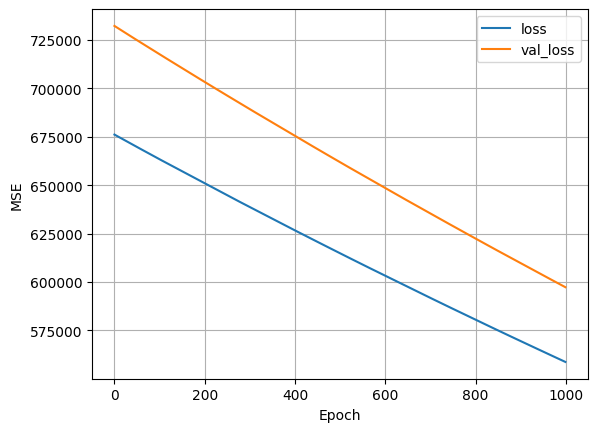

In [93]:
plot_loss(history)

**Interpretaion**
* Initially ->  both the training and validation losses decrease together -> which mean  that the model is learning effectively



The  gap between the train-vald loss  after around 600-700 epochs --> may be the model is overfitting.

**Overfitting** ?? when the model learns the noise or specific details in the training data, which negatively impacts its ability to generalize to new data

based on what the graph show : the model improves its performance on both the training and validation datasets initially but  starts to overfit.
-> so The ideal number of epochs would be where the validation loss is minimized, which appears to be before the 700th epoch  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


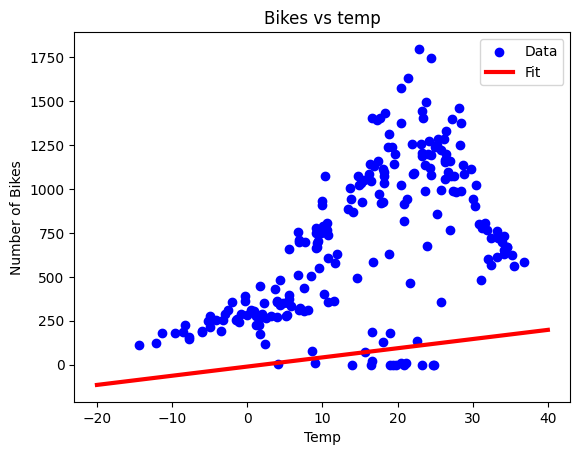

In [94]:
plt.scatter(X_train_temp , y_train_temp , label="Data" , color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x , temp_nn_model.predict(np.array(x).reshape(-1,1)) , label ="Fit" ,color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

* temperature increases - > more people rent bikes - > positive relationship between temperature and bike rentals -> **positive Correlation**
* The blue dots around the line --> variability in the data --> could be due to other factors
* This model provides a good fit to the data -> as the red line closely follows the trend of the data points -> the relationship can be approximated by a linear model ->

# **Deep Neural Network**

* more  then one hidden layer
* Relu  = max( 0,z) = The non - linear transoformation
* z is the  linear transofmration o f the input o f the layer


In [95]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [96]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp , y_val_temp),
    verbose=0, epochs=100
)

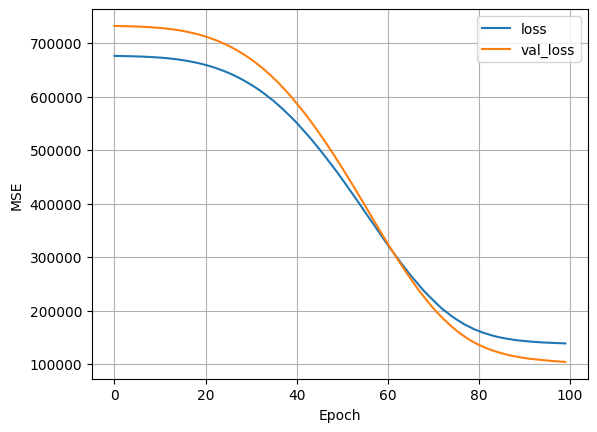

In [97]:
plot_loss(history)

* train loss :  The model's loss on the training data decreases ->  effective learning
* valid loss : also decreases -> starts stabilize  around 80 epochs -> suggesting the model is generalizing well
* Optimal Epochs -> the best performance is likely achieved before the validation loss starts stabilize -> around 60–80 epochs

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


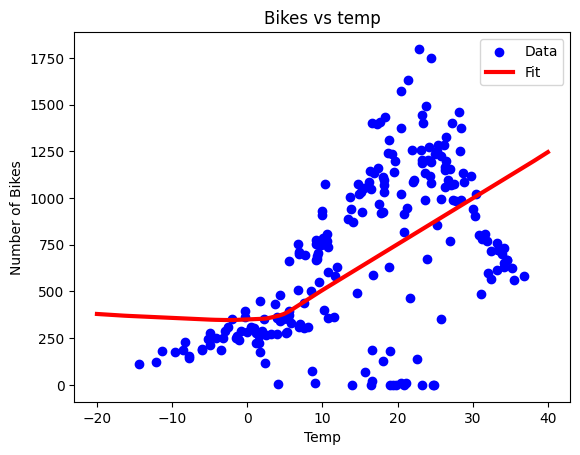

In [98]:
plt.scatter(X_train_temp , y_train_temp , label="Data" , color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x , nn_model.predict(np.array(x).reshape(-1, 1)), label ="Fit" ,color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [99]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [101]:
print(X_train_all.shape)


(219, 6)


In [102]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all , y_val_all),
    verbose=0, epochs=100
)

# **Performance comparaison**

Preparing the predicitons : Linear Regression - Deep neural Network

In [104]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [105]:
def MSE(y_pred , y_real):
  return (np.square(y_pred - y_real)).mean()

### Calculate the MSE for both Linear reg and Neur-net

In [106]:
MSE(y_pred_nn , y_test_all)

np.float64(110179.17483115877)

In [107]:
MSE(y_pred_lr , y_test_all)

np.float64(93211.10313927432)

* linear regression model has a lower MSE than the neural network --> it performs better overall in terms of minimizing squared prediction errors
possible causes :    
   - The neural network may be overfitting or poorly tuned
   - The data may be too noisy or not complex enough to justify using a deep model
   - The network architecture or training configuration

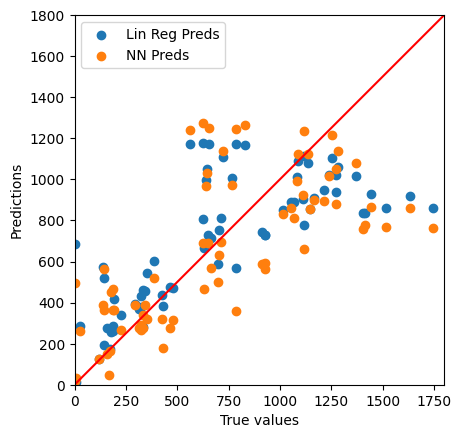

In [108]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all , y_pred_lr , label="Lin Reg Preds")
plt.scatter(y_test_all , y_pred_nn , label="NN Preds")
plt.xlabel("True values")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims , c="red")

* red line = perfecte prediction y = x
* the neural network sometimes seems better for smaller values